# Linear Regression<a class="anchor" id ="steps"></a>
# steps
[perform data preprocessing](#step1)<br>[
create correlation table/heatmap to explore the relationships between variable](#step2)<br>s[Train a Linear Regression model](#step3)<br>r[on mo evaluation](#step4)<br>del



# Step 1: Read and preprocess the data<a class="anchor" id="step1"></a>

[go_back_up](#steps)

In [1]:
import pandas as pd
wine_quality = pd.read_csv('winequality.csv')
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [54]:
#Which variable has the highest positive correlation with the target variable?
correlation = wine_quality.corr()
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free sulfur dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total sulfur dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


# Step 2: create correlation table/heatmap to explore the relationships between variables<a class="anchor" id="step2"></a>

[go_back_up](#steps)

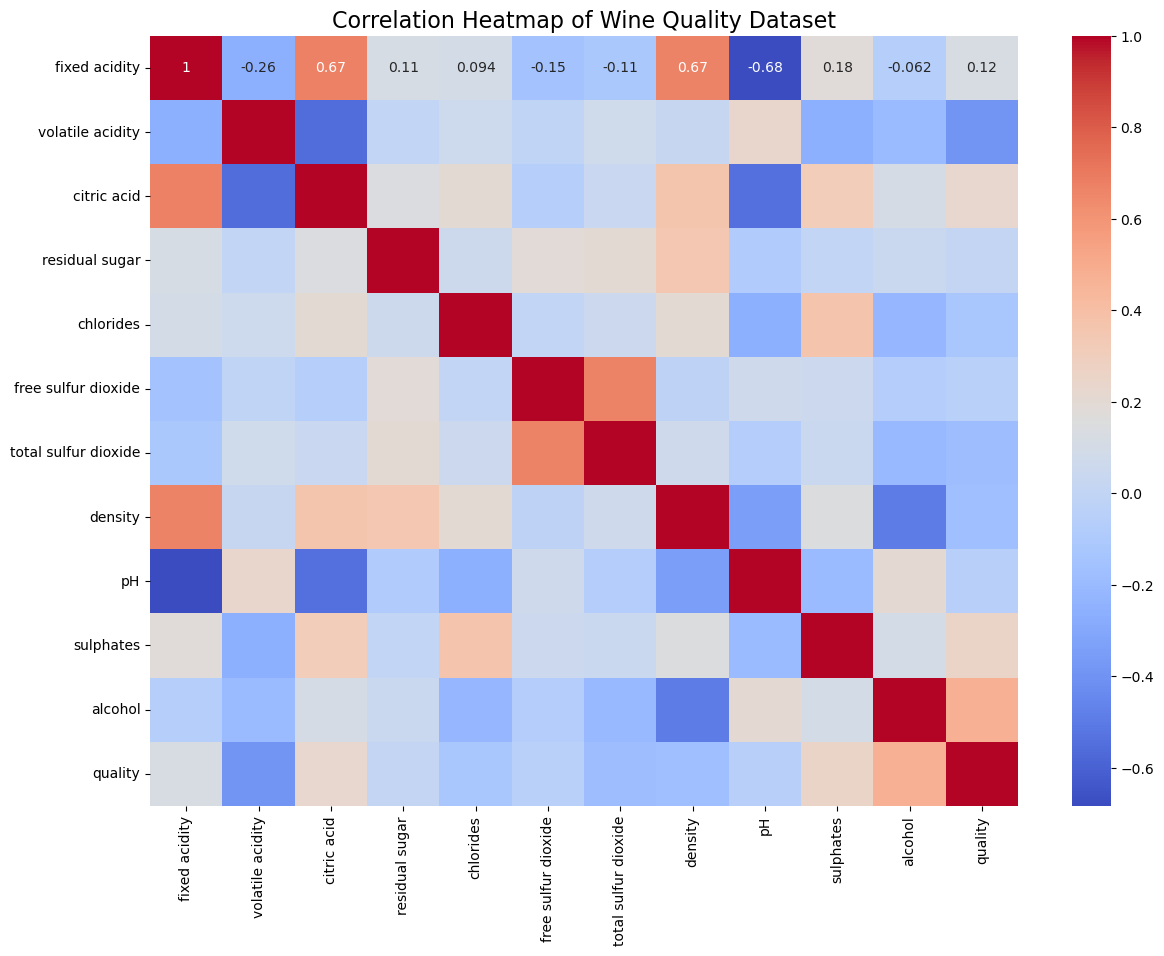

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.figure(figsize=(14, 6))
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot = True,cmap ='coolwarm' )
plt.title("Correlation Heatmap of Wine Quality Dataset", fontsize=16)
plt.show()

#### check the Multicollinearity, which variable has the highest VIF?



In [21]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Don't show numbers in scientific notation
pd.set_option("display.float_format", "{:.2f}".format)

# calculate VIF for predictors
predictors = wine_quality.drop(['quality'], axis=1)

# Adding a constant for the intercept term
predictors = sm.add_constant(predictors)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = predictors.columns
vif_data["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

print(vif_data.sort_values(by = 'VIF'))

                 feature        VIF
10             sulphates       1.43
5              chlorides       1.48
4         residual sugar       1.70
2       volatile acidity       1.79
6    free sulfur dioxide       1.96
7   total sulfur dioxide       2.19
11               alcohol       3.03
3            citric acid       3.13
9                     pH       3.33
8                density       6.34
1          fixed acidity       7.77
0                  const 1710538.50



### Perform feature scaling using StandardScaler() before creating a linear regression model

In [25]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = wine_quality.drop(['quality'], axis=1)
X_std = pd.DataFrame(scaler.fit_transform(X),columns =X.columns)
X_std

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96
1,-0.30,1.97,-1.39,0.04,0.22,0.87,0.62,0.03,-0.72,0.13,-0.58
2,-0.30,1.30,-1.19,-0.17,0.10,-0.08,0.23,0.13,-0.33,-0.05,-0.58
3,1.65,-1.38,1.48,-0.45,-0.26,0.11,0.41,0.66,-0.98,-0.46,-0.58
4,-0.53,0.96,-1.39,-0.45,-0.24,-0.47,-0.38,0.56,1.29,-0.58,-0.96
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.22,0.40,-0.98,-0.38,0.05,1.54,-0.08,-0.98,0.90,-0.46,0.07
1595,-1.39,0.12,-0.88,-0.24,-0.54,2.21,0.14,-0.86,1.35,0.60,0.73
1596,-1.16,-0.10,-0.72,-0.17,-0.24,1.26,-0.20,-0.53,0.71,0.54,0.54
1597,-1.39,0.65,-0.78,-0.38,-0.26,1.54,-0.08,-0.68,1.68,0.31,-0.21


In [29]:
X_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.14,-2.28,-1.39,-1.16,-1.60,-1.42,-1.23,-3.54,-3.70,-1.94,-1.90
25%,-0.70,-0.77,-0.93,-0.45,-0.37,-0.85,-0.74,-0.61,-0.66,-0.64,-0.87
50%,-0.24,-0.04,-0.06,-0.24,-0.18,-0.18,-0.26,0.00,-0.01,-0.23,-0.21
75%,0.51,0.63,0.77,0.04,0.05,0.49,0.47,0.58,0.58,0.42,0.64
max,4.36,5.88,3.74,9.20,11.13,5.37,7.38,3.68,4.53,7.92,4.20


### Use 80% of the data as the training set and the rest 20% of the data as test set.
####  Make a 80 (training) & 20 (test) split of the sample data. How many rows and columns are there in X_train set?!

In [35]:
#traintest splitting
y = wine_quality[['quality']]
X = wine_quality.drop(['quality'], axis=1)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)
X_train.shape

(1279, 11)


## step:3 Train a Linear Regression Model <a class="anchor" id="step3"></a>

[go_back_up](#steps)

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
coeff_df = pd.DataFrame(model.coef_, columns= X.columns) 
coeff_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.07,-0.21,-0.03,0.04,-0.09,0.03,-0.09,-0.06,-0.04,0.16,0.29


## step:4 Model Evaluation <a class="anchor" id="step 4"></a>

[go_back_up](#steps)

In [42]:
import statsmodels.api as sm
X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     66.34
Date:                Sun, 17 Nov 2024   Prob (F-statistic):          6.26e-117
Time:                        13:54:35   Log-Likelihood:                -1268.8
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1267   BIC:                             2624.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    5.6503 

### Evaluate the linear regression model on test set
#### What is the Root Mean Squared Error for the test set?

#### Based on the value of Root Mean Squared Error, which data set performs better in predicting wine quality? 

In [47]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [49]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(y_test, y_test_pred)) 
print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(y_train, y_train_pred)) 

print('Mean Squared Error on Test Data:', metrics.mean_squared_error(y_test, y_test_pred))   
print('Mean Squared Error on Training Data:', metrics.mean_squared_error(y_train, y_train_pred))

print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))) 
print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))) 

Mean Absolute Error on Test Data: 0.4696330928661114
Mean Absolute Error on Training Data: 0.5096144189638795
Mean Squared Error on Test Data: 0.3844711978201242
Mean Squared Error on Training Data: 0.4258083784387745
Root Mean Squared Error on Test Data: 0.6200574149384266
Root Mean Squared Error on Training Data: 0.6525399439411924


#### What is the R squared on test set?

In [51]:
# R squared on both training and test
from sklearn.metrics import r2_score
r_sq_test = r2_score(y_test, y_test_pred)
print('R squared on test set:', r_sq_test)

R squared on test set: 0.3283887639580225
